In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importing dataset with pandas and reading first 5 rows
df_ted = pd.read_csv("20221013_ted_talks.csv")
df_ted.head(10)

,talk_id,title,speaker,recorded_date,published_date,event,duration,views,likes
0,1,Averting the climate crisis,Al Gore,2006-02-25,2006-06-27,TED2006,957,3681537,110000
1,7,Simplicity sells,David Pogue,2006-02-24,2006-06-27,TED2006,1266,2012797,60000
2,53,Greening the ghetto,Majora Carter,2006-02-26,2006-06-27,TED2006,1096,3006315,90000
3,92,The best stats you've ever seen,Hans Rosling,2006-02-22,2006-06-27,TED2006,1176,15432904,462000
4,66,Do schools kill creativity?,Sir Ken Robinson,2006-02-25,2006-06-27,TED2006,1151,73935964,2200000
5,86,Letting go of God,Julia Sweeney,2006-02-24,2006-07-10,TED2006,978,4836214,145000
6,49,Behind the design of Seattle's library,Joshua Prince-Ramus,2006-02-23,2006-07-10,TED2006,1184,1261975,37000
7,71,A life of purpose,Rick Warren,2006-02-25,2006-07-18,TED2006,1248,4300620,129000
8,94,Let's teach religion -- all religion -- in sch...,Dan Dennett,2006-02-02,2006-07-18,TED2006,1471,4227594,126000
9,54,My wish: A call for open-source architecture,Cameron Sinclair,2006-02-26,2006-07-25,TED2006,1394,1372030,41000


In [4]:
#summary of the dataset
df_ted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5701 entries, 0 to 5700
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   talk_id         5701 non-null   int64 
 1   title           5701 non-null   object
 2   speaker         5700 non-null   object
 3   recorded_date   5699 non-null   object
 4   published_date  5701 non-null   object
 5   event           5700 non-null   object
 6   duration        5701 non-null   int64 
 7   views           5701 non-null   int64 
 8   likes           5701 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 401.0+ KB


In [5]:
# Dropping the talk_id column
df_ted =df_ted.drop(columns=('talk_id'))
df_ted.head(10)

,title,speaker,recorded_date,published_date,event,duration,views,likes
0,Averting the climate crisis,Al Gore,2006-02-25,2006-06-27,TED2006,957,3681537,110000
1,Simplicity sells,David Pogue,2006-02-24,2006-06-27,TED2006,1266,2012797,60000
2,Greening the ghetto,Majora Carter,2006-02-26,2006-06-27,TED2006,1096,3006315,90000
3,The best stats you've ever seen,Hans Rosling,2006-02-22,2006-06-27,TED2006,1176,15432904,462000
4,Do schools kill creativity?,Sir Ken Robinson,2006-02-25,2006-06-27,TED2006,1151,73935964,2200000
5,Letting go of God,Julia Sweeney,2006-02-24,2006-07-10,TED2006,978,4836214,145000
6,Behind the design of Seattle's library,Joshua Prince-Ramus,2006-02-23,2006-07-10,TED2006,1184,1261975,37000
7,A life of purpose,Rick Warren,2006-02-25,2006-07-18,TED2006,1248,4300620,129000
8,Let's teach religion -- all religion -- in sch...,Dan Dennett,2006-02-02,2006-07-18,TED2006,1471,4227594,126000
9,My wish: A call for open-source architecture,Cameron Sinclair,2006-02-26,2006-07-25,TED2006,1394,1372030,41000


In [6]:
#checking for null values
df_ted.isnull().sum()

title             0
speaker           1
recorded_date     2
published_date    0
event             1
duration          0
views             0
likes             0
dtype: int64

In [7]:
#dropping the entire column with null values
df_ted.dropna(inplace = True)


In [8]:
#checking to see if rows were dropped
df_ted.isnull().sum()

title             0
speaker           0
recorded_date     0
published_date    0
event             0
duration          0
views             0
likes             0
dtype: int64

### TED talk with the most views 

In [9]:
#display the ted talk with the most views
top_views = df_ted.sort_values(by = 'views', ascending = False)
top_views.head(10)

,title,speaker,recorded_date,published_date,event,duration,views,likes
4,Do schools kill creativity?,Sir Ken Robinson,2006-02-25,2006-06-27,TED2006,1151,73935964,2200000
1339,Your body language may shape who you are,Amy Cuddy,2012-06-26,2012-10-01,TEDGlobal 2012,1245,66163329,1900000
2150,Inside the mind of a master procrastinator,Tim Urban,2016-02-16,2016-03-15,TED2016,834,63543965,1900000
672,How great leaders inspire action,Simon Sinek,2009-09-17,2010-05-04,TEDxPuget Sound,1067,60129500,1800000
831,The power of vulnerability,Brené Brown,2010-06-06,2010-12-23,TEDxHouston,1202,59438598,1700000
1768,How to speak so that people want to listen,Julian Treasure,2013-06-10,2014-06-27,TEDGlobal 2013,584,51709191,1500000
2904,My philosophy for a happy life,Sam Berns,2013-10-25,2018-03-28,TEDxMidAtlantic 2013,765,45113426,1300000
1940,The next outbreak? We're not ready,Bill Gates,2015-03-18,2015-04-03,TED2015,503,44248349,1300000
2100,What makes a good life? Lessons from the longe...,Robert Waldinger,2015-11-14,2015-12-23,TEDxBeaconStreet,757,43270567,1200000
449,10 things you didn't know about orgasm,Mary Roach,2009-02-06,2009-05-20,TED2009,983,39330527,1100000


### TED Talk with the most likes 

In [10]:
top_likes = df_ted.sort_values(by = 'likes', ascending = False)
top_likes.head(10)

,title,speaker,recorded_date,published_date,event,duration,views,likes
4,Do schools kill creativity?,Sir Ken Robinson,2006-02-25,2006-06-27,TED2006,1151,73935964,2200000
1339,Your body language may shape who you are,Amy Cuddy,2012-06-26,2012-10-01,TEDGlobal 2012,1245,66163329,1900000
2150,Inside the mind of a master procrastinator,Tim Urban,2016-02-16,2016-03-15,TED2016,834,63543965,1900000
672,How great leaders inspire action,Simon Sinek,2009-09-17,2010-05-04,TEDxPuget Sound,1067,60129500,1800000
831,The power of vulnerability,Brené Brown,2010-06-06,2010-12-23,TEDxHouston,1202,59438598,1700000
1768,How to speak so that people want to listen,Julian Treasure,2013-06-10,2014-06-27,TEDGlobal 2013,584,51709191,1500000
2904,My philosophy for a happy life,Sam Berns,2013-10-25,2018-03-28,TEDxMidAtlantic 2013,765,45113426,1300000
1940,The next outbreak? We're not ready,Bill Gates,2015-03-18,2015-04-03,TED2015,503,44248349,1300000
2100,What makes a good life? Lessons from the longe...,Robert Waldinger,2015-11-14,2015-12-23,TEDxBeaconStreet,757,43270567,1200000
1409,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,2012-10-27,2013-01-16,TEDxMidAtlantic,560,38900767,1100000


### Number of TED Talk Speakers 

In [11]:
#total number of speakers
unique_speaker = len(pd.unique(df_ted['speaker']))
  
print( "Number of speakers:",unique_speaker)

Number of speakers: 4636


### Total Duration of TED Talk Given 

In [12]:
#total number of views in all the Ted talk
#df_ted.sum(axis='views')
Total_views = df_ted['views'].sum()
print(Total_views)

12240474165


### Question: Top 10 Videos with most View to Like Ratio?

In [13]:
views_to_like = []

data = df_ted.values

for i in range(len(data)):
    views_to_like.append(round(data[i][6]/data[i][7],2))

#creating the new column VTL_Ratio 
df_ted['VTL_Ratio'] = views_to_like
   

In [14]:
df_ted.sort_values(by = ['VTL_Ratio'], ascending= False).head()

,title,speaker,recorded_date,published_date,event,duration,views,likes,VTL_Ratio
4884,How reverse mentorship can help create better ...,Patrice Gordon,2020-11-23,2020-11-23,The Way We Work,278,366577,10000,36.66
1152,A census of the ocean,Paul Snelgrove,2011-07-14,2012-02-28,TEDGlobal 2011,990,365491,10000,36.55
1047,The right to understand,Sandra Fisher-Martins,2011-03-21,2011-11-06,TEDxO'Porto,931,365319,10000,36.53
1119,What happens inside those massive warehouses?,Mick Mountz,2011-06-28,2012-01-29,TEDxBoston 2011,717,364825,10000,36.48
2983,The hardest step in innovation? Looking foolis...,Jack Levis,2015-09-02,2018-05-04,TED@UPS,599,36463,1000,36.46


### Question: Number of TED Talk publised in 2020?

#### Number of TED Talk that was publised in 2020 

Remember our data has a published dat column that contains both month and year, we need to split the date(which was in a form of a single array) to 2 arrays which will containing the year and month. We do this using the split function.
- We use a loop to tell python to print only the published date column
- Then we tell it to use the split function to seperate the column from one to 3 different arrays using the - seperator
- We then use index (using the square bracket) to seperate it into 3 different arrays
- We then define the year and month with an empty list
- Then remove the print in the for loop and replace with the month and year and use append so python can add the values of month and year into the empty list.
- We then go ahead to create a new column in our original dataframe to add our values in it.

In [15]:
data = df_ted.values

year = []
month = []


for i in range(len(data)):
    year.append(data[i][3].split('-')[0])
    month.append(data[i][3].split('-')[1])

In [16]:
df_ted['year'] = year
df_ted['month'] = month
df_ted.head()

,title,speaker,recorded_date,published_date,event,duration,views,likes,VTL_Ratio,year,month
0,Averting the climate crisis,Al Gore,2006-02-25,2006-06-27,TED2006,957,3681537,110000,33.47,2006,06
1,Simplicity sells,David Pogue,2006-02-24,2006-06-27,TED2006,1266,2012797,60000,33.55,2006,06
2,Greening the ghetto,Majora Carter,2006-02-26,2006-06-27,TED2006,1096,3006315,90000,33.40,2006,06
3,The best stats you've ever seen,Hans Rosling,2006-02-22,2006-06-27,TED2006,1176,15432904,462000,33.40,2006,06
4,Do schools kill creativity?,Sir Ken Robinson,2006-02-25,2006-06-27,TED2006,1151,73935964,2200000,33.61,2006,06


In [17]:
df_ted['speaker'].value_counts()

Alex Gendler               47
Iseult Gillespie           37
Matt Walker                18
 TED-Ed                    15
Alex Rosenthal             15
                           ..
Anote Tong                  1
Genevieve von Petzinger     1
Ann Morgan                  1
Regina Hartley              1
Riley Moynes                1
Name: speaker, Length: 4636, dtype: int64

In [18]:
#To split the rows with more than one name in the speaker column
ted_speaker = df_ted['speaker'].str.split(',', expand=True).stack()

#Creating a new dataframe for the new speaker column that has been splitted
ted_speaker = pd.DataFrame(ted_speaker)
ted_speaker.head(2)

,,0
0,0,Al Gore
1,0,David Pogue


In [19]:
# name the column
ted_speaker.columns = ['Speakers']

In [20]:
ted_speaker =ted_speaker.groupby(['Speakers']).size().reset_index(name='Number of Ted event')
ted_speaker.head()

,Speakers,Number of Ted event
0,Al Gore,1
1,Alok Sharma and Nigel Topping,1
2,Anthony D. Romero,1
3,B.E.A.T. NYC,1
4,Butterscotch,1


In [21]:
#Creating a dataframe and sorting the values in descending order so we can see speakers with higher counts
top_speaker = pd.DataFrame(ted_speaker.sort_values(by=['Number of Ted event'], ascending=False)).head(5)
top_speaker

,Speakers,Number of Ted event
182,Alex Gendler,47
1886,Iseult Gillespie,37
2985,Matt Walker,18
186,Alex Rosenthal,15
1366,Elizabeth Cox,15


In [22]:
#setting the index to carry the names instead of row numbers
top_speaker = top_speaker.set_index('Speakers')
top_speaker

,Number of Ted event
Speakers,
Alex Gendler,47
Iseult Gillespie,37
Matt Walker,18
Alex Rosenthal,15
Elizabeth Cox,15


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 720x576 with 0 Axes>

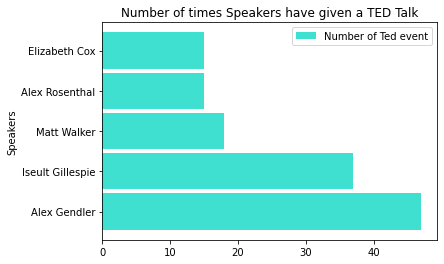

In [24]:
#plotting a chart to adequately summarize our findings
plt.figure(figsize=(10,8))
top_speaker.plot(kind='barh', color='turquoise',width=0.9)
plt.title('Number of times Speakers have given a TED Talk')
plt.show

### TED Talks published in Year 2020 

In [28]:
#This code displays all the TED Talks published in 2020
Ted_20 = df_ted[df_ted['year'] == '2020']
Ted_20


,title,speaker,recorded_date,published_date,event,duration,views,likes,VTL_Ratio,year,month
4261,A brief history of alcohol,Rod Phillips,2020-01-02,2020-01-02,TED-Ed,296,5573725,167000,33.38,2020,01
4262,Dangerous times call for dangerous women,Pat Mitchell,2019-12-04,2020-01-02,TEDWomen 2019,1024,2136834,64000,33.39,2020,01
4263,"To challenge the status quo, find a ""co-conspi...",Ipsita Dasgupta,2019-09-24,2020-01-02,TED@BCG Mumbai,653,1513429,45000,33.63,2020,01
4264,"The ""opportunity gap"" in US public education -...",Anindya Kundu,2019-05-14,2020-01-03,TED Residency,470,2497640,74000,33.75,2020,01
4265,"The past, present and future of nicotine addic...",Mitch Zeller,2019-03-29,2020-01-03,TEDxMidAtlantic,1041,2353973,70000,33.63,2020,01
...,...,...,...,...,...,...,...,...,...,...,...
4918,How we can actually pay people enough -- with ...,TED Business,2020-11-22,2020-12-18,TED Audio Collective,1242,1218192,36000,33.84,2020,12
4919,6 big ethical questions about the future of AI,Genevieve Bell,2020-10-22,2020-12-18,TED Salon Dell Technologies,878,1934481,58000,33.35,2020,12
4920,The strange history of the world's most stolen...,Noah Charney,2020-12-21,2020-12-21,TED-Ed,317,774420,23000,33.67,2020,12
4921,How do personality tests work?,Merve Emre,2020-12-22,2020-12-22,TED-Ed,278,1109213,33000,33.61,2020,12


In [29]:
#Number of ted talk published in 2020
len(Ted_20)

660

### Trend of TED Talk Publised Yearly 

Text(0.5, 1.0, 'Trend of TED Talk publised by Year')

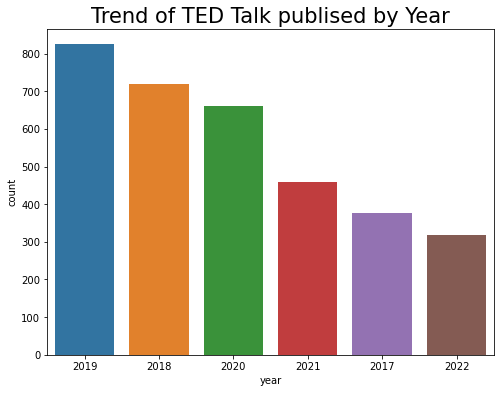

In [33]:
plt.figure(figsize=(8,6))
ted_year = df_ted['year'].value_counts()
ted_year = pd.DataFrame(ted_year).reset_index()
ted_year.columns = ['year','count']
sns.barplot(x= 'year',y='count',data=ted_year.head(6))
plt.title('Trend of TED Talk publised by Year',fontsize=21)

### Question: TED Talk Speaker with the highest Number of Views 

In [34]:
speaker_views = df_ted.groupby('speaker').sum()['views'].sort_values(ascending = False).head()
speaker_views.head()

speaker
Alex Gendler        204794194
Sir Ken Robinson     99168817
Bill Gates           82398868
Simon Sinek          79760215
Brené Brown          76977259
Name: views, dtype: int64

In [35]:
speaker_views = pd.DataFrame(speaker_views)
speaker_views.head()

,views
speaker,
Alex Gendler,204794194
Sir Ken Robinson,99168817
Bill Gates,82398868
Simon Sinek,79760215
Brené Brown,76977259


Text(0.5, 1.0, 'Top 5 TED Talk Speakers by Views in Millions')

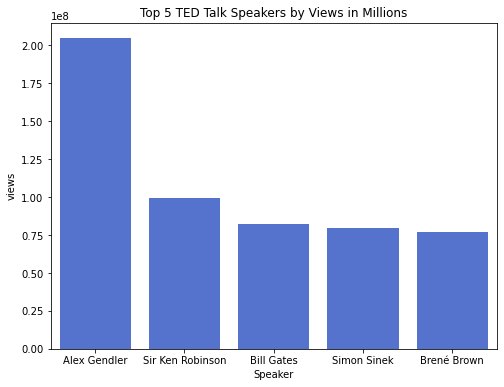

In [36]:
# A bar plot to show the top Top 5 TED Talk Speakers by views in millions
plt.figure(figsize=(8, 6))
sns.barplot(x=speaker_views.index, y=speaker_views['views'], data=speaker_views, color='royalblue')
plt.xlabel('Speaker')
plt.title('Top 5 TED Talk Speakers by Views in Millions')

###  Yearly Trend in Alex Gandler's TED Talk 

In [41]:
Alex_Gendler = df_ted[df_ted['speaker'] == 'Alex Gendler'].sort_values(by= 'published_date',ascending = False)
Alex_Gendler

,title,speaker,recorded_date,published_date,event,duration,views,likes,VTL_Ratio,year,month
5657,The original ring of power,Alex Gendler,2022-09-06,2022-09-06,TED-Ed,318,387830,11000,35.26,2022,09
5446,Building the impossible: Golden Gate Bridge,Alex Gendler,2022-02-22,2022-02-22,TED-Ed,306,615922,18000,34.22,2022,02
5379,"Blood, concrete, and dynamite: Building the Ho...",Alex Gendler,2021-12-23,2021-12-22,TED-Ed,291,819255,24000,34.14,2021,12
5113,The woman who stared at the sun,Alex Gendler,2021-05-24,2021-05-24,TED-Ed,299,2009009,60000,33.48,2021,05
5080,How one design flaw almost toppled a skyscraper,Alex Gendler,2021-05-06,2021-05-06,TED-Ed,297,772350,23000,33.58,2021,05
5071,"Demolition, disease, and death: Building the P...",Alex Gendler,2021-04-27,2021-04-27,TED-Ed,315,884344,26000,34.01,2021,04
5063,How the world's tallest skyscraper was built,Alex Gendler,2021-04-20,2021-04-20,TED-Ed,346,882549,26000,33.94,2021,04
5059,Why are airplanes slower than they used to be?,Alex Gendler,2021-04-15,2021-04-15,TED-Ed,279,2358533,70000,33.69,2021,04
4906,Building the world's largest (and most controv...,Alex Gendler,2020-12-10,2020-12-10,TED-Ed,318,887921,26000,34.15,2020,12
4903,Can you solve the monster duel riddle?,Alex Gendler,2020-12-08,2020-12-08,TED-Ed,293,2382734,71000,33.56,2020,12


<AxesSubplot:xlabel='year'>

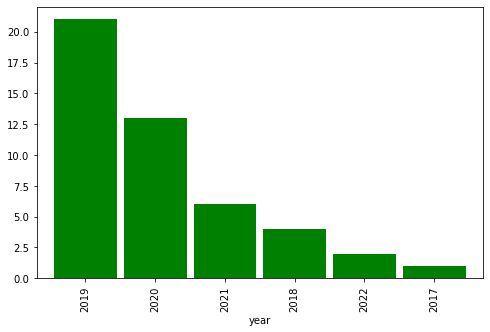

In [51]:
Alex_Gendler.groupby('year').size().sort_values(ascending = False).plot(kind= 'bar',color='g', figsize= (8,5), width= 0.9)